In [2]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D, Dropout
from keras.optimizers import RMSprop
from keras.datasets import mnist
from keras.utils import np_utils
#from keras import initializations
#In Keras 2.0,  initializations was renamed (mirror) as initializers


/Users/hbi16859/anaconda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#from keras import initializations
#In Keras 2.0,  initializations was renamed (mirror) as initializers
from keras import initializers
from keras import backend as K

In [4]:

batch_size = 128
nb_classes = 10
nb_epoch = 100

img_rows, img_cols = 28, 28         # input image dimensions
pool_size = (2, 2)                  # size of pooling area for max pooling
prob_drop_conv = 0.2                # drop probability for dropout @ conv layer
prob_drop_hidden = 0.5              # drop probability for dropout @ fc layer

In [5]:
#the code below are for old API
#def init_weights(shape, name=None):
#    return initializations.normal(shape, scale=0.01, name=name)

In [6]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train original shape:', X_train.shape)

if K.image_dim_ordering() == 'th':
    # For Theano backend
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    # For TensorFlow backend
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

('X_train original shape:', (60000, 28, 28))


In [7]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

('X_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


In [8]:

# Convolutional model
model = Sequential()

# conv1 layer
#model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu', input_shape=input_shape, init=init_weights))
model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu', input_shape=input_shape, kernel_initializer=initializers.random_normal(stddev=0.01)))
model.add(MaxPooling2D(pool_size=pool_size, strides=(2,2), border_mode='same'))
model.add(Dropout(prob_drop_conv))

# conv2 layer
#model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu', init=init_weights))
model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu', kernel_initializer=initializers.random_normal(stddev=0.01)))
model.add(MaxPooling2D(pool_size=pool_size, strides=(2,2), border_mode='same'))
model.add(Dropout(prob_drop_conv))

# conv3 layer
#model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu', init=init_weights))
model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu', kernel_initializer=initializers.random_normal(stddev=0.01)))
model.add(MaxPooling2D(pool_size=pool_size, strides=(2,2), border_mode='same'))
model.add(Flatten())
model.add(Dropout(prob_drop_conv))

# fc1 layer
#model.add(Dense(625, activation='relu', init=init_weights))
model.add(Dense(625, activation='relu', kernel_initializer=initializers.random_normal(stddev=0.01)))
model.add(Dropout(prob_drop_hidden))

# fc2 layer
#model.add(Dense(10, activation='softmax', init=init_weights))
model.add(Dense(10, activation='softmax', kernel_initializer=initializers.random_normal(stddev=0.01)))

opt = RMSprop(lr=0.001, rho=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
__________

/Users/hbi16859/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", activation="relu", kernel_initializer=<keras.ini..., input_shape=(28, 28, 1...)`
  import sys
/Users/hbi16859/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(padding="same", strides=(2, 2), pool_size=(2, 2))`
  
/Users/hbi16859/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", activation="relu", kernel_initializer=<keras.ini...)`
  del sys.path[0]
/Users/hbi16859/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(padding="same", strides=(2, 2), pool_size=(2, 2))`
  
/Users/hbi16859/anaconda/lib/python2.7/site-packages/ipykernel_l

In [26]:
history = model.fit(X_train, Y_train, nb_epoch=5, validation_split=0.33,batch_size=batch_size, shuffle=True, verbose=1) 
#instead of using 100, just use 5 for nb_epoch to check
#According to the Keras.io documentation, it seems like in order to be able to use 'val_acc' and 'val_loss' 
#you need to enable validation and accuracy monitoring. Doing so would be as simple as adding a validation_split
#to the model.fit in your code
#e.g., validation_split=0.33,

Train on 40199 samples, validate on 19801 samples
Epoch 1/5
40199/40199 [==============================] - 73s - loss: 0.0429 - acc: 0.9873 - val_loss: 0.0297 - val_acc: 0.9898
Epoch 2/5
40199/40199 [==============================] - 72s - loss: 0.0390 - acc: 0.9878 - val_loss: 0.0240 - val_acc: 0.9925
Epoch 3/5
40199/40199 [==============================] - 72s - loss: 0.0363 - acc: 0.9888 - val_loss: 0.0307 - val_acc: 0.9906
Epoch 4/5
40199/40199 [==============================] - 72s - loss: 0.0350 - acc: 0.9896 - val_loss: 0.0235 - val_acc: 0.9926
Epoch 5/5
40199/40199 [==============================] - 73s - loss: 0.0311 - acc: 0.9908 - val_loss: 0.0254 - val_acc: 0.9925


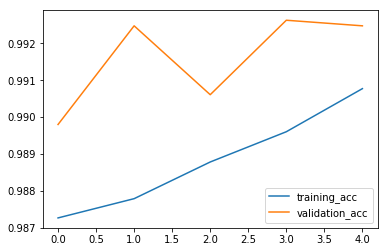

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
#plt.plot(history.history['loss'])
plt.plot(history.history['val_acc'])
#plt.plot(history.history['val_loss'])
plt.legend(['training_acc','validation_acc'], loc = 'lower right')
#plt.legend(['training_acc', 'train_loss','validation_acc','val_loss'], loc = 'lower right')
#plt.yscale("log")
plt.show()

In [28]:
history.history

{'acc': [0.9872633647632829,
  0.98778576581507,
  0.9887808154431702,
  0.9896017313863529,
  0.9907709146993706],
 'loss': [0.04290619160174766,
  0.038961984925070026,
  0.03625331121008039,
  0.0349923773894308,
  0.03105538542448598],
 'val_acc': [0.9897984950375445,
  0.9924751275308529,
  0.9906065350355244,
  0.9926266350304741,
  0.9924751275308529],
 'val_loss': [0.02972832565945535,
  0.024046158540536194,
  0.030671868795404556,
  0.023495746049455236,
  0.02540115476656476]}

In [32]:
results = model.evaluate(X_test, Y_test)

 9952/10000 [============================>.] - ETA: 0s

In [33]:
results

[0.02458070343588406, 0.9919]

In [35]:
#check to see wehther I can use artificial values in the convolution layers
# Convolutional model
model2 = Sequential()

# conv1 layer
#model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu', input_shape=input_shape, init=init_weights))
model2.add(Convolution2D(30, 3, 3, border_mode='same', activation='relu', input_shape=input_shape, kernel_initializer=initializers.random_normal(stddev=0.01)))
model2.add(MaxPooling2D(pool_size=pool_size, strides=(2,2), border_mode='same'))
model2.add(Dropout(prob_drop_conv))

# conv2 layer
#model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu', init=init_weights))
model2.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu', kernel_initializer=initializers.random_normal(stddev=0.01)))
model2.add(MaxPooling2D(pool_size=pool_size, strides=(2,2), border_mode='same'))
model2.add(Dropout(prob_drop_conv))

# conv3 layer
#model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu', init=init_weights))
model2.add(Convolution2D(100, 3, 3, border_mode='same', activation='relu', kernel_initializer=initializers.random_normal(stddev=0.01)))
model2.add(MaxPooling2D(pool_size=pool_size, strides=(2,2), border_mode='same'))
model2.add(Flatten())
model2.add(Dropout(prob_drop_conv))

# fc1 layer
#model.add(Dense(625, activation='relu', init=init_weights))
model2.add(Dense(50, activation='relu', kernel_initializer=initializers.random_normal(stddev=0.01)))
model2.add(Dropout(prob_drop_hidden))

# fc2 layer
#model.add(Dense(10, activation='softmax', init=init_weights))
model2.add(Dense(10, activation='softmax', kernel_initializer=initializers.random_normal(stddev=0.01)))

opt = RMSprop(lr=0.001, rho=0.9)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

/Users/hbi16859/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(30, (3, 3), padding="same", activation="relu", kernel_initializer=<keras.ini..., input_shape=(28, 28, 1...)`
  import sys
/Users/hbi16859/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(padding="same", strides=(2, 2), pool_size=(2, 2))`
  
/Users/hbi16859/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", activation="relu", kernel_initializer=<keras.ini...)`
  del sys.path[0]
/Users/hbi16859/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(padding="same", strides=(2, 2), pool_size=(2, 2))`
  
/Users/hbi16859/anaconda/lib/python2.7/site-packages/ipykernel_l

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 30)        300       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        17344     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 100)         57700     
__________

In [36]:
history2 = model2.fit(X_train, Y_train, nb_epoch=2, validation_split=0.33,batch_size=batch_size, shuffle=True, verbose=1) 


Train on 40199 samples, validate on 19801 samples
Epoch 1/2
40199/40199 [==============================] - 63s - loss: 0.9525 - acc: 0.6680 - val_loss: 0.2762 - val_acc: 0.9116
Epoch 2/2
40199/40199 [==============================] - 63s - loss: 0.3792 - acc: 0.8799 - val_loss: 0.1802 - val_acc: 0.9435


In [ ]:
##From model2, we can tell that the use of artificial vlaues in the convolution layer is not problem at all
#as long as we provide the right dimensions for the input data
#all the intermediate shapes are figured out by keras automatically

In [37]:
history2.history

{'acc': [0.668026567826553, 0.8799223861290082],
 'loss': [0.9525183189472466, 0.37923972591171723],
 'val_acc': [0.91162062524503, 0.943538205165236],
 'val_loss': [0.2761869783335506, 0.18015780686672922]}